<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Assignment 1 - Mario Aditya </font></h1>

Title : Assignment 1

Import library yang akan digunakan dalam tugas ini : *pandas* and **Numpy**.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\mario.aditya\Documents\File Python\assignment1\data\london_crime_by_lsoa.csv')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
# Let's view the top 5 rows of the dataset using the head() function.
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
# We can also veiw the bottom 5 rows of the dataset using the tail() function.
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


When analyzing a dataset, it's always a good idea to start by getting basic information about your dataframe. We can do this by using the `info()` method.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


To get the list of column headers we can call upon the dataframe's `.columns` parameter.

In [6]:
df.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

Similarly, to get the list of indicies we use the `.index` parameter.

In [7]:
df.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

To view the dimensions of the dataframe, we use the `.shape` parameter.

In [8]:
df.shape

(13490604, 7)

Cek apakah ada data yang missing

In [9]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Masukan library matplotlib

In [10]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [26]:
years = list(map(int,np.sort(df['year'].unique())))

major_categories = list(df['major_category'].unique())

boroughs = list(df['borough'].unique())

colors_list = ['darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightslategray', 'lightslategrey', 'lightsteelblue', 'lightyellow', 'lime', 'limegreen', 'linen', 'magenta', 'maroon', 'mediumaquamarine', 'mediumblue', 'mediumorchid', 'mediumpurple', 'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'mediumturquoise', 'mediumvioletred', 'midnightblue', 'mintcream', 'mistyrose', 'moccasin', 'navajowhite', 'navy', 'oldlace', 'olive', 'olivedrab', 'orange', 'orangered', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise', 'palevioletred', 'papayawhip', 'peachpuff', 'peru', 'pink', 'plum', 'powderblue', 'purple', 'rebeccapurple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna']

months = list(range(1,13))

# Data Frame untuk Kategori Kejahatan

In [19]:
data = {}
for year in years:
    data_per_tahun = df[
        df['year'] == year
    ].groupby('major_category')['value'].sum()
    
    # menyiapkan Series untuk kebutuhan dataframe
    data[year] = pd.Series(
        data=map(int, data_per_tahun.reset_index()['value'].values),
        index=data_per_tahun.index)
    # Membuat dataframe dengan 'major_category' sebagai index dan years sebagai columns
df_major_year = pd.DataFrame(
    columns=years,
    index=major_categories,
    data=data)
df_major_year['Total'] = df_major_year[years].sum(axis=1)

# urutkan data berdasarkan Total dari tertinggi ke terendah
df_major_year.sort_values(by='Total', ascending=False, inplace=True)

In [20]:
df_major_year.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765


In [21]:
df_major_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Theft and Handling to Sexual Offences
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2008    9 non-null      int64
 1   2009    9 non-null      int64
 2   2010    9 non-null      int64
 3   2011    9 non-null      int64
 4   2012    9 non-null      int64
 5   2013    9 non-null      int64
 6   2014    9 non-null      int64
 7   2015    9 non-null      int64
 8   2016    9 non-null      int64
 9   Total   9 non-null      int64
dtypes: int64(10)
memory usage: 792.0+ bytes


# Data Frame untuk Area Kejahatan

In [31]:
data = {}
for year in years:
    data_per_wilayah = df[
        df['year'] == year
    ].groupby('borough')['value'].sum()
    
    # menyiapkan Series untuk kebutuhan dataframe
    data[year] = pd.Series(
        data=map(int, data_per_wilayah.reset_index()['value'].values),
        index=data_per_wilayah.index)
    # Membuat dataframe dengan 'borough' sebagai index dan years sebagai columns
df_borough_year = pd.DataFrame(
    columns=years,
    index=boroughs,
    data=data)

df_borough_year['Total'] = df_borough_year[years].sum(axis=1)

# urutkan data berdasarkan 'Total' dari tertinggi ke terendah
df_borough_year.sort_values(by='Total', ascending=False, inplace=True)

In [44]:
df_borough_year.tail(10)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Kensington and Chelsea,20663,18742,19481,19146,19757,17702,17840,19070,19580,171981
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447
Havering,15395,14538,14957,15496,15965,15089,14734,15870,16903,138947
Harrow,13774,13948,13945,12801,12803,11914,11909,12601,13153,116848
Merton,13875,13561,13595,13548,12856,11595,11596,12273,12755,115654
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Sutton,12943,12240,12032,11068,10948,10057,10443,10598,10658,100987
Richmond upon Thames,11106,10618,10601,10896,11168,10439,10456,10413,11074,96771
Kingston upon Thames,10661,10163,10171,10155,9956,9191,9288,9738,9983,89306
City of London,0,0,0,69,157,110,115,151,178,780


# Data Frame untuk Trend Kejahatan Per Bulan

In [34]:
data = {}
for year in years:
    # Ambil semua data pada tahun = 'year', grouping berdasarkan 'Bulan', summing 'Jumlah Kasus'
    crime_year_month = df[
        (df['year'] == year)
    ].groupby('month')['value'].sum()
    
    # menyiapkan Series untuk kebutuhan dataframe
    data[year] = pd.Series(
        data=map(int, crime_year_month.reset_index()['value'].values),
        index=crime_year_month.index
    )

# Membuat dataframe dengan 'Month' sebagai index dan years sebagai columns
df_crime_year_month = pd.DataFrame(
    columns=years,
    index=range(1,13,1),
    data=data
)
df_crime_year_month['Total'] = df_crime_year_month[years].sum(axis=1)

# rename index dengan nama bulan dan bukan angka
months_name = ['Jan','Feb','March','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dict_index = {}
for i in range(1,13,1):
    dict_index[i] = months_name[i-1]
df_crime_year_month.rename(index=dict_index,inplace=True)

In [35]:
df_crime_year_month.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Jan,65419,59142,54934,57966,62436,58933,55515,57055,58847,530247
Feb,62626,54706,55069,54895,56735,55271,51222,53316,56697,500537
March,61343,63482,63629,61282,67537,57590,57669,60096,59167,551795
Apr,59640,59181,60085,58714,58801,55678,53467,56445,58637,520648
May,62587,62897,62126,62630,64344,56765,56327,61038,63990,552704


## Area Pots (Series/Dataframe) <a id="12"></a>

**What is a line plot and why use it?**

An Area chart or area plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields. Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.

**Questions:**

Melihat trend kategori atau jenis crime dari tahun ke tahun per wilayah di London

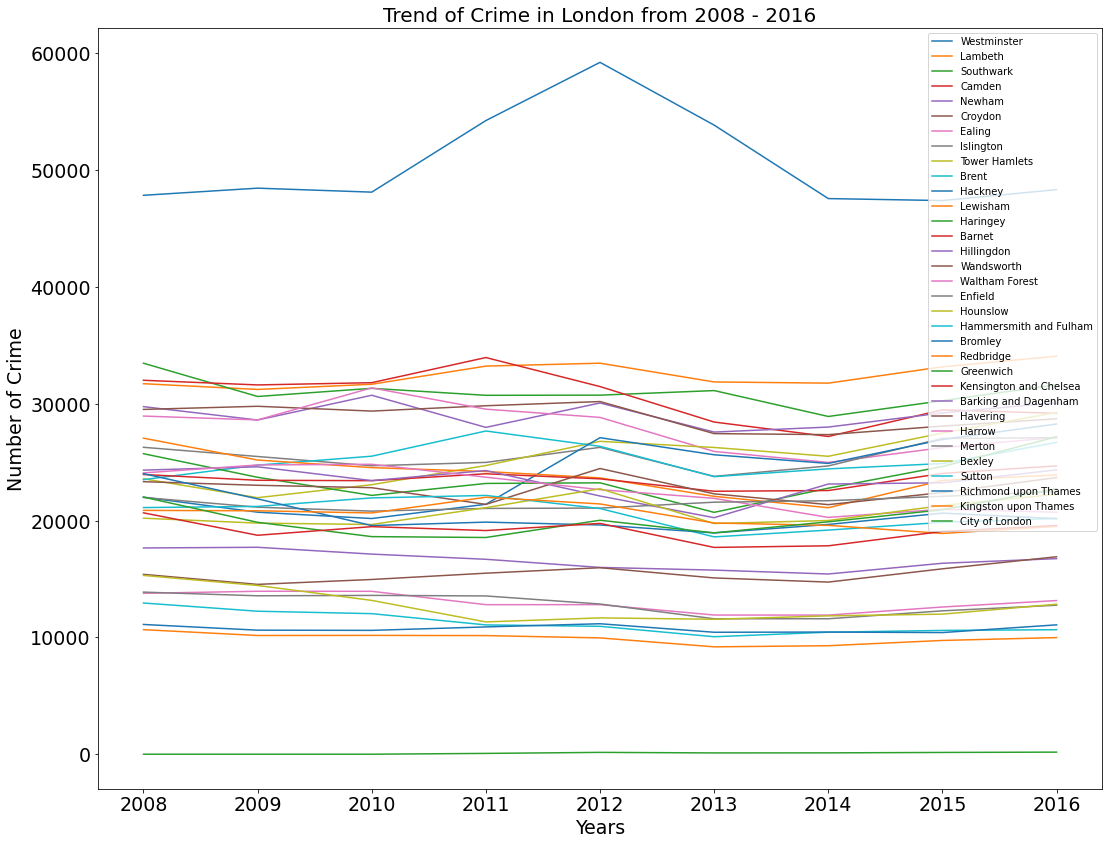

In [37]:
df_borough_year[years].transpose().plot(figsize=(18,14))
plt.xlabel('Years',fontsize=19)
plt.ylabel('Number of Crime', fontsize=19)
plt.xticks(fontsize=19)
plt.yticks(fontsize=19)
plt.title('Trend of Crime in London from 2008 - 2016', fontsize=20)
plt.legend(fontsize=10, loc='upper right')
plt.show()

**Insight:**

(Dapat dilihat bahwa beberapa wilayah di London memiliki jumlah kejadian kejahatan yang tinggi dibandingkan wilayah lainnya, misalnya area Westminster yang memiliki kasus terbanyak atau area City of London yang sangat rendah)

## Histogram

A histogram is a way of representing the frequency distribution of numeric dataset. The way it works is it partitions the x-axis into bins, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.

**Question:**

(bagaimana distribusi frekuensi dari tahun ke tahun)

In [46]:
# Untuk keperluan plotting
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
df_borough_year.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024


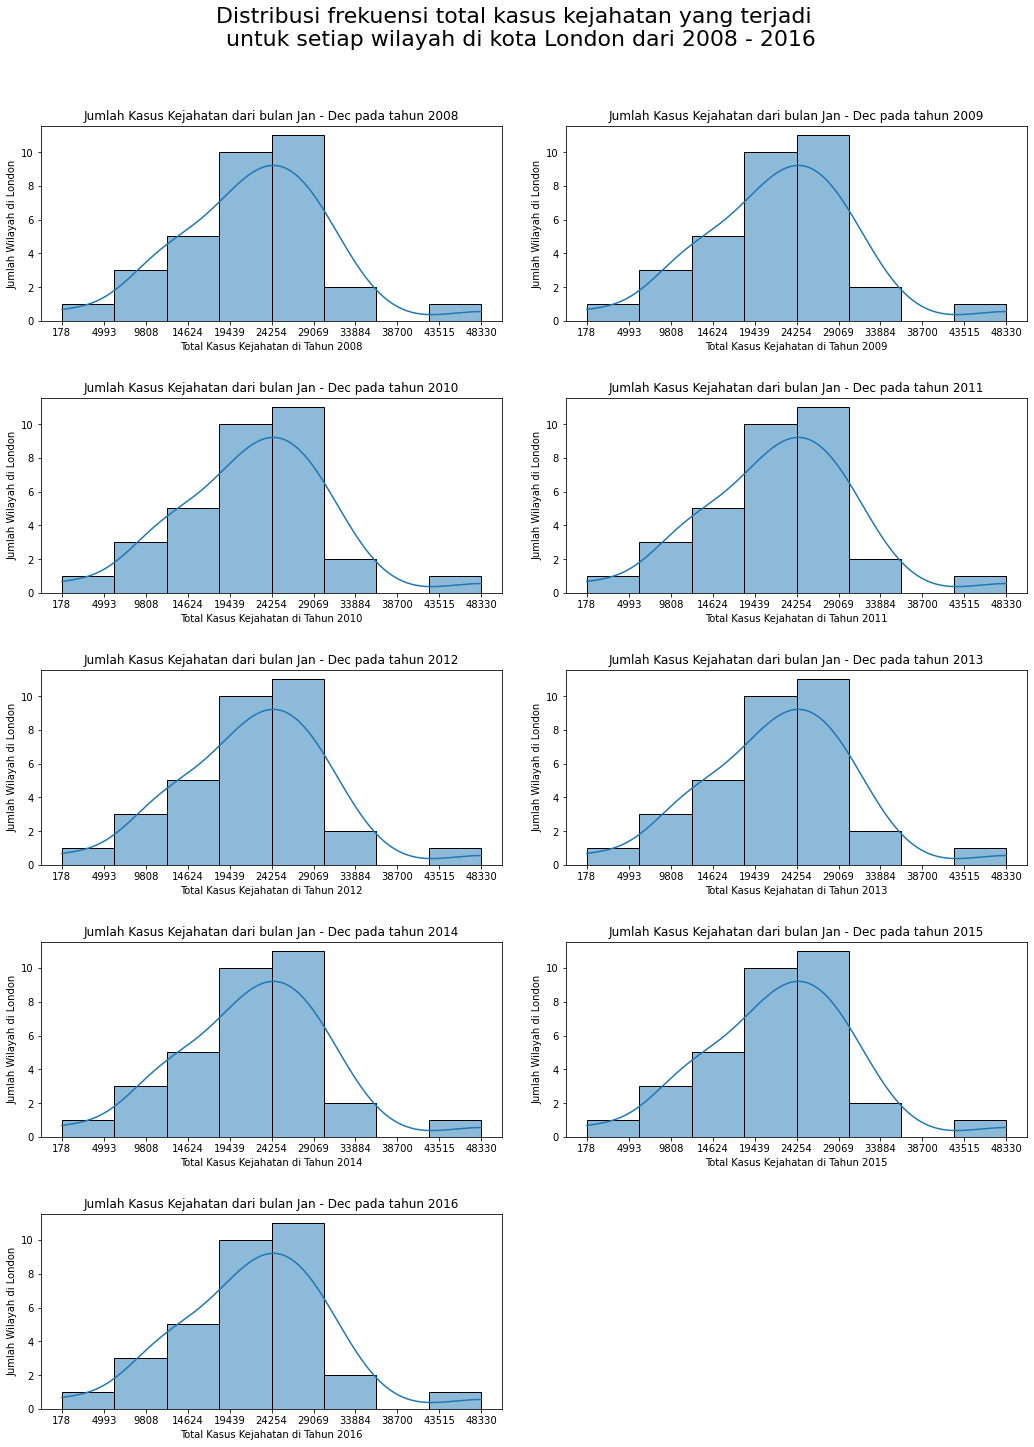

In [51]:
n_rows = int(len(years))
n_cols = 2

fig = plt.figure(figsize=(15, 35)) # membuat figure untuk menampung subplot
ax_s = [] #menampung ax untuk setiap subplot

plot_number = 1 #inisialisasi plot number dari 1

for tahun in years:
    # hitung bin_edges dari setiap kategori 
    count, bin_edges = np.histogram(df_borough_year[years][year])
    
    # subplot histogram
    ax_s.append(fig.add_subplot(n_rows, n_cols, plot_number))
    sns.histplot(df_borough_year[years][year],kde=True, ax=ax_s[plot_number-1])
    ax_s[plot_number -1].set_title('Jumlah Kasus Kejahatan dari bulan Jan - Dec pada tahun '+str(tahun))
    ax_s[plot_number-1].set(xlabel = "Total Kasus Kejahatan di Tahun "+str(tahun), ylabel = "Jumlah Wilayah di London")
    
    # mengatur nilai pada sumbu x dengan masing-masing bin_edges
    ax_s[plot_number-1].set_xticks(bin_edges)
    
    #increment plot_number setiap looping years
    plot_number += 1

fig.suptitle("Distribusi frekuensi total kasus kejahatan yang terjadi \n untuk setiap wilayah di kota London dari 2008 - 2016", y=1, fontsize=22)
fig.tight_layout(pad=3.0)  # giving padding between plot in subplot
plt.show()

**Insight:**

1. Dengan melihat grafik yang ada, dapat dilihat bahwa sebaran yang terjadi adalah distribusi normal
2. Rata-rata kejadian tiap tahunnya ada di angka kisaran 24000an


## Bar Charts (Dataframe) <a id="10"></a>

A bar plot is a way of representing data where the *length* of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals. 

To create a bar plot, we can pass one of two arguments via `kind` parameter in `plot()`:

* `kind=bar` creates a *vertical* bar plot
* `kind=barh` creates a *horizontal* bar plot

**Question:**

Top 5 wilayah dengan kasus kejahatan paling tinggi

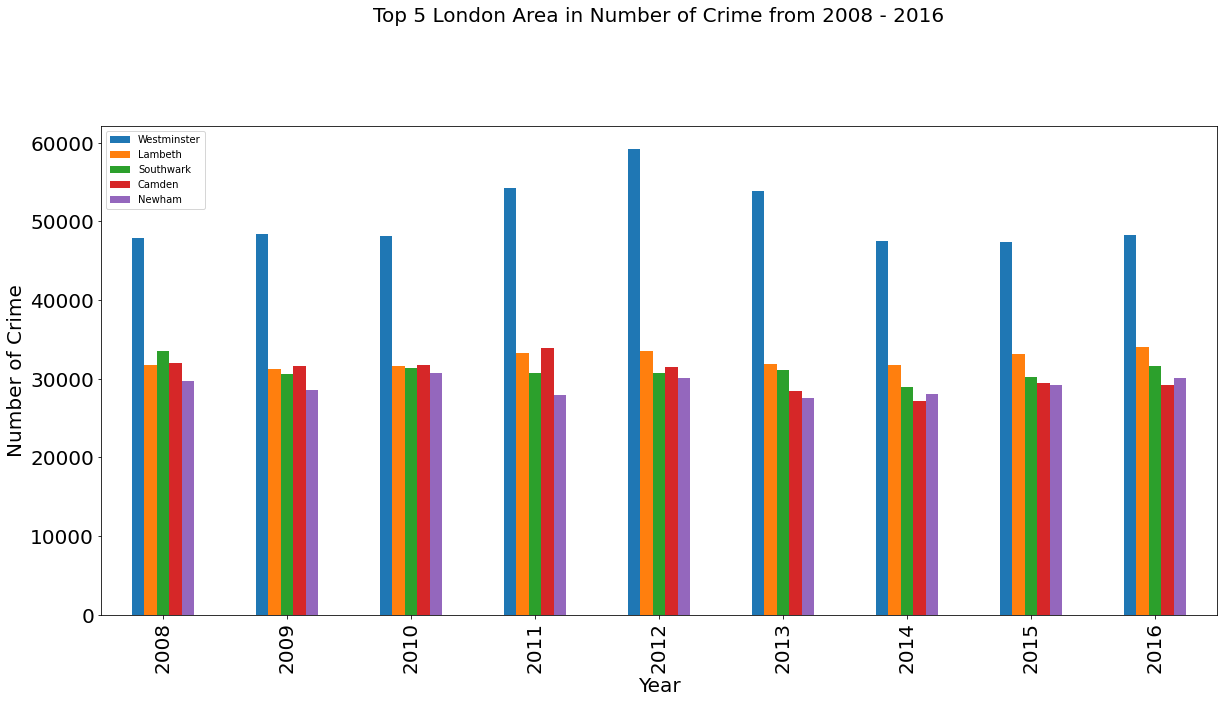

In [67]:
df_borough_year[years].head().transpose().plot(figsize=(20, 9), kind='bar')
plt.legend(loc='upper left', fontsize=10)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Number of Crime', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Top 5 London Area in Number of Crime from 2008 - 2016', fontsize=20, y=1.2)
plt.show()

**Insight:**

Wilayah Westminster memiliki tingkat kejahatan yang paling tinggi bila dibandingkan dengan wilayah lainnya

## Pie Charts <a id="6"></a>

A `pie chart` is a circualr graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the `kind=pie` keyword.

**Question:**

(Make your own questions)

In [ ]:
df_major = df.groupby('major_category', axis=0).sum()
df_major

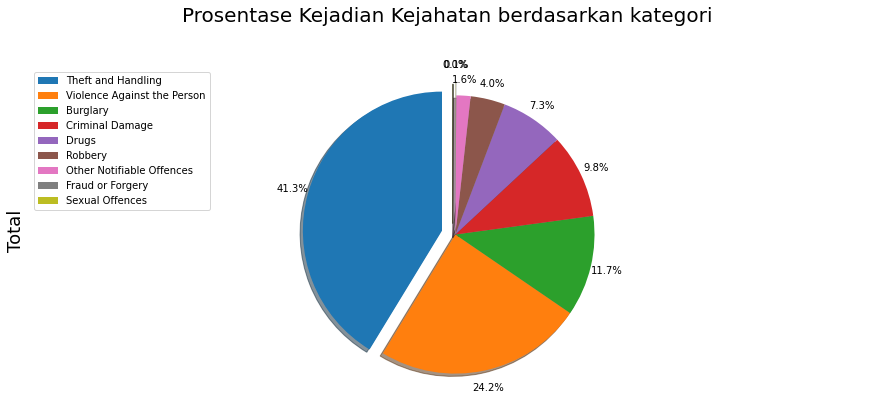

In [73]:
# Write your function below

# ratio for each continent with which to offset each wedge.
explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0.1, 0.1]
df_pie = df_major_year['Total']

# Graded-Funtion Begin (~8 Lines)
df_pie.plot(kind='pie',
                      figsize=(15, 6),
                      autopct='%1.1f%%',
                      startangle=90,
                      shadow=True,
                      labels=None,         # turn off labels on pie chart
                      # the ratio between the center of each pie slice and the start of the text generated by autopct
                      pctdistance=1.12,
                      explode=explode_list  # 'explode'
                      )
# Graded-Funtion End

# scale the title up by 12% to match pctdistance
plt.title('Prosentase Kejadian Kejahatan berdasarkan kategori', y=1.12, fontsize=20)
plt.ylabel('Total',fontsize=18)
plt.axis('equal')

# add legend
plt.legend(labels=df_pie.index, loc='upper left')

plt.show()

**Insight:**

Theft and Handling merupakan kategori kejahatan yang paling sering terjadi

## Box Plots <a id="8"></a>

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions: 

- **Minimun:** Smallest number in the dataset.
- **First quartile:** Middle number between the `minimum` and the `median`.
- **Second quartile (Median):** Middle number of the (sorted) dataset.
- **Third quartile:** Middle number between `median` and `maximum`.
- **Maximum:** Highest number in the dataset.

**Question:**

Bagaimana distribusi secara statistik dari total kejahatan yang terjadi tiap tahunnya

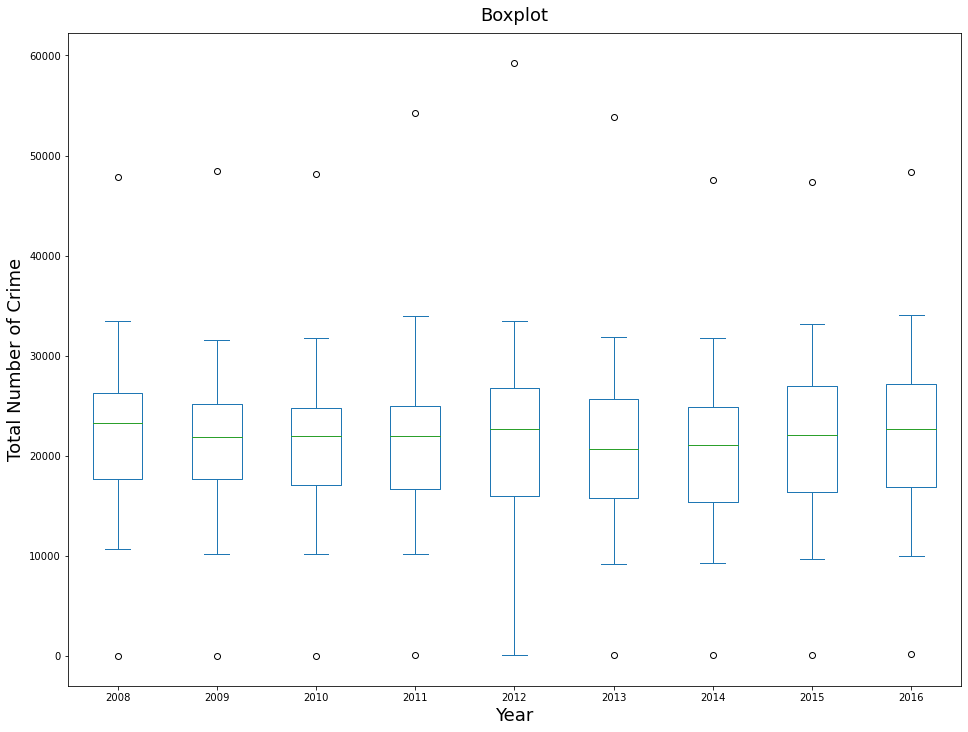

In [75]:
df_borough_year[years].plot(
    kind='box',
    figsize=(16,12),
)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Total Number of Crime', fontsize=18)
plt.title('Boxplot',  fontsize=18, y=1.01)
plt.show()

**Insight:**

1. Dari boxplot yang ada dapat dilihat bahwa jumlah sebaran kasusnya seperti yang digambarkan dengan histogram sebelumnya, yaitu di angka kisaran 23000an
2. kecuali di tahun 2012, range di tiap tahunnya hampir mirip.

## Scatter Plots <a id="10"></a>

A `scatter plot` (2D) is a useful method of comparing variables against each other. `Scatter` plots look similar to `line plots` in that they both map independent and dependent variables on a 2D graph. While the datapoints are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

**Question:**

(Make your own questions)

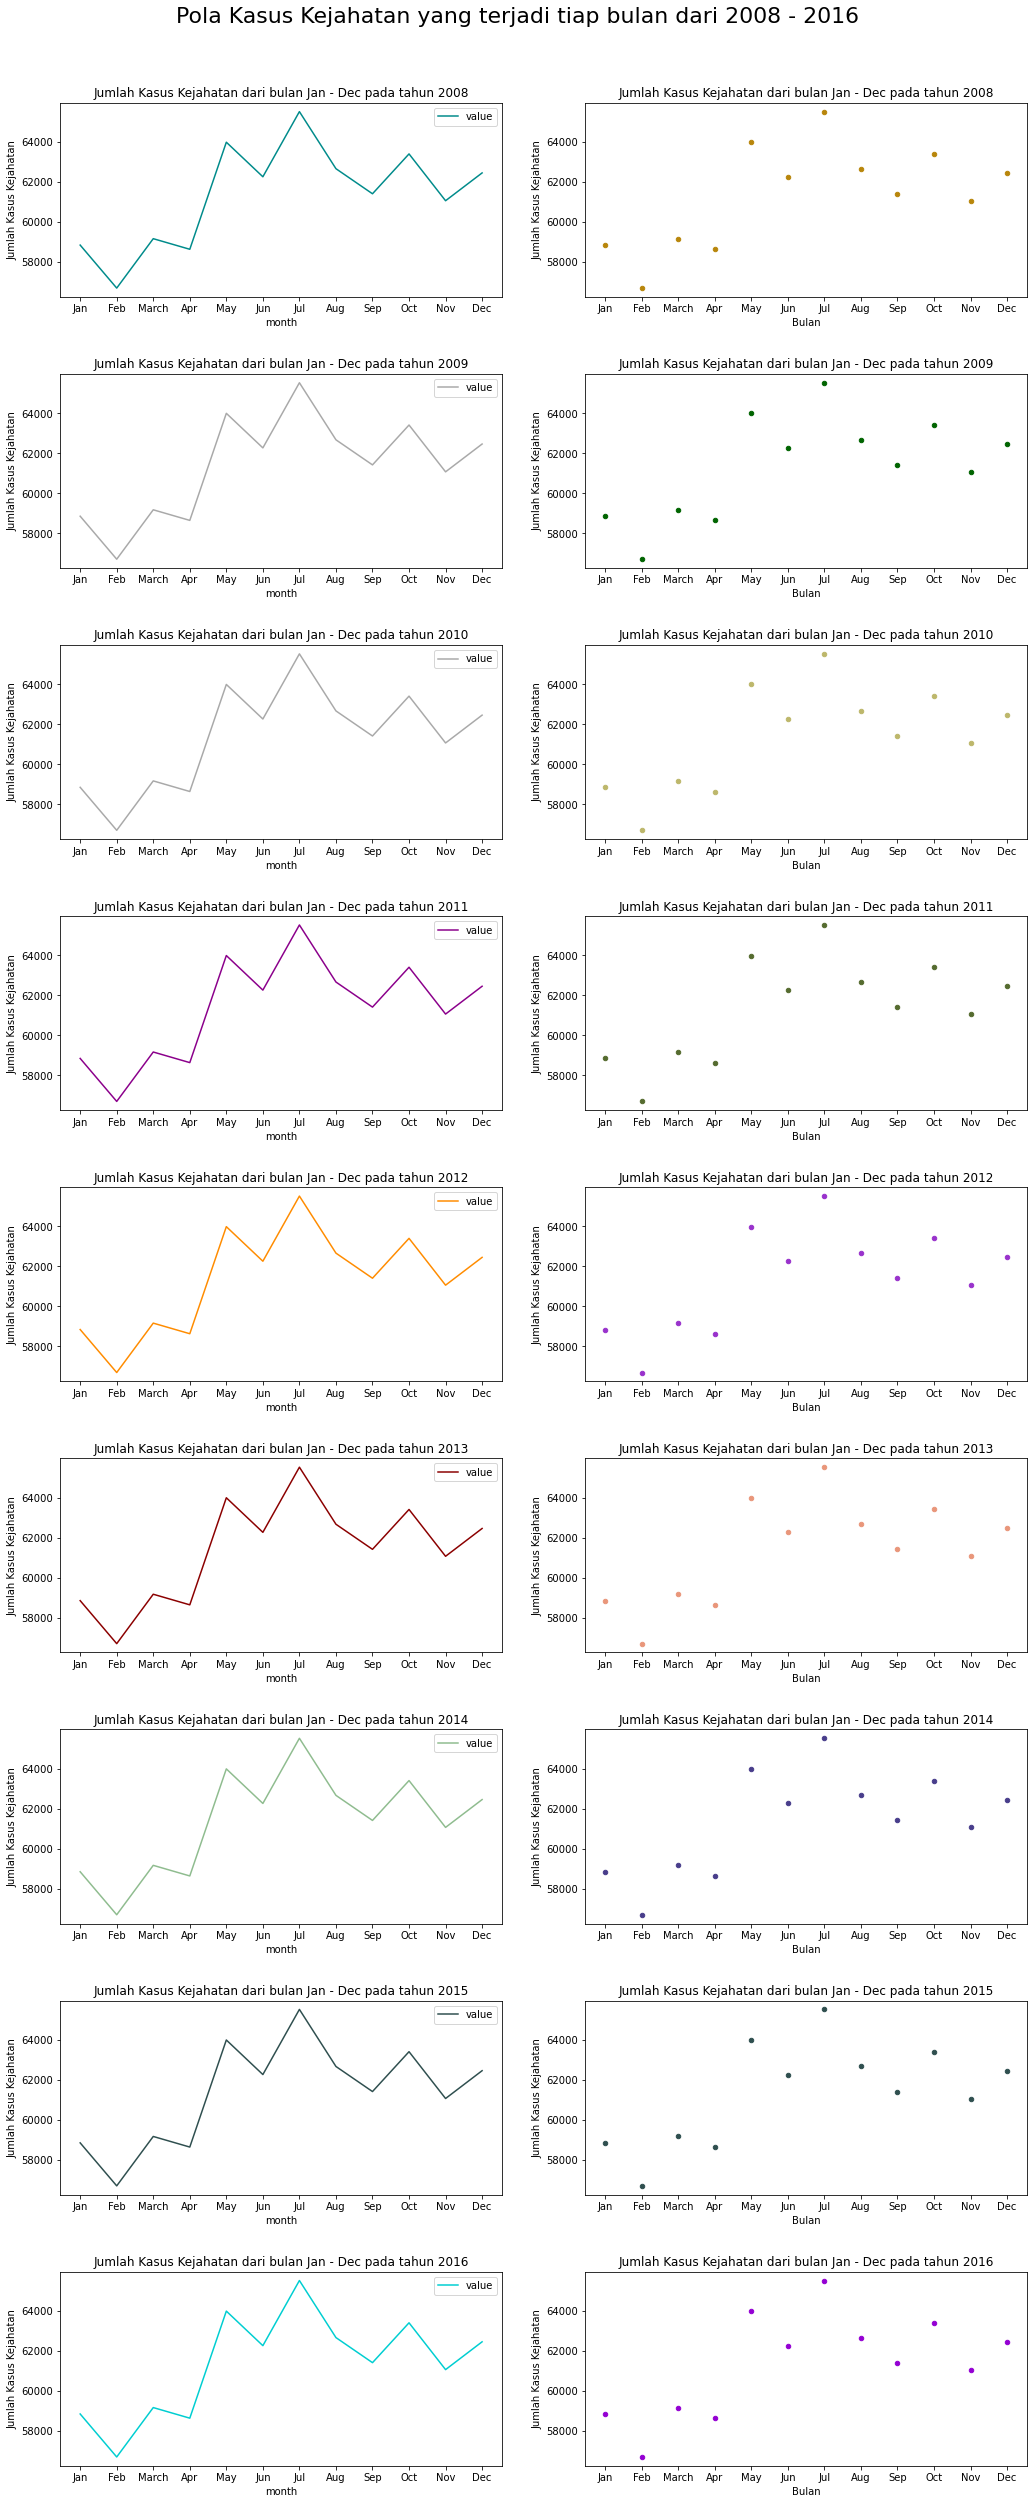

In [78]:
n_rows = int(len(years))
n_cols = 2

fig = plt.figure(figsize=(15, 35)) # membuat figure untuk menampung subplot
ax_s = [] #menampung ax untuk setiap subplot

plot_number = 1 #inisialisasi plot_number subplot dari 1

for tahun in years:
    #subplot line plot
    ax_s.append(fig.add_subplot(n_rows, n_cols, plot_number))
    
    #ambil data pada tahun tertentu, group berdasarkan bulan lalu sum 'Jumlah Kasus'-nya
    df_1 = df[
        (df['year'] == year)
    ][['month', 'value']].groupby('month').sum()
    
    #plotting
    df_1.plot(
        kind='line',
        ax=ax_s[plot_number-1],
        color=colors_list[plot_number-1]
    )
    ax_s[plot_number -
         1].set_title('Jumlah Kasus Kejahatan dari bulan Jan - Dec pada tahun '+str(tahun))
    ax_s[plot_number-1].set_xlabel('month')
    ax_s[plot_number-1].set_ylabel('Jumlah Kasus Kejahatan')
    ax_s[plot_number-1].set_xticks(months)
    ax_s[plot_number-1].set_xticklabels(months_name)
    plot_number += 1
    
    # subplot scatter plot
    ax_s.append(fig.add_subplot(n_rows, n_cols, plot_number))
    df_1.reset_index(inplace=True)
    df_1.columns = ['month', 'value']
    df_1.plot(
        kind='scatter',
        x='month',
        y='value',
        ax=ax_s[plot_number-1],
        color=colors_list[plot_number-1]
    )
    ax_s[plot_number -
         1].set_title('Jumlah Kasus Kejahatan dari bulan Jan - Dec pada tahun '+str(tahun))
    ax_s[plot_number-1].set_xlabel('Bulan')
    ax_s[plot_number-1].set_ylabel('Jumlah Kasus Kejahatan')
    # mengubah index dan labels pada sumbu x agar diganti menjadi nama bulan
    ax_s[plot_number-1].set_xticks(months)
    ax_s[plot_number-1].set_xticklabels(months_name)
    
    #increment plot_number in each itteration
    plot_number += 1

fig.suptitle("Pola Kasus Kejahatan yang terjadi tiap bulan dari 2008 - 2016", y=1, fontsize=22)
fig.tight_layout(pad=3.0)  # giving padding between plot in subplot
plt.show()

Analisis:
1. Terjadi pola kenaikan kejahatan di periode tengah tahun
2. Terjadi penurunan kejahatan di periode awal dan akhir tahun

## Word Clouds <a id="8"></a>


`Word` clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

In [79]:
# install wordcloud
# !conda install -c conda-forge wordcloud --yes

!pip install wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [80]:
stopwords = set(STOPWORDS)

In [83]:
# instantiate a word cloud object
your_wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
your_wordcloud.generate('df')

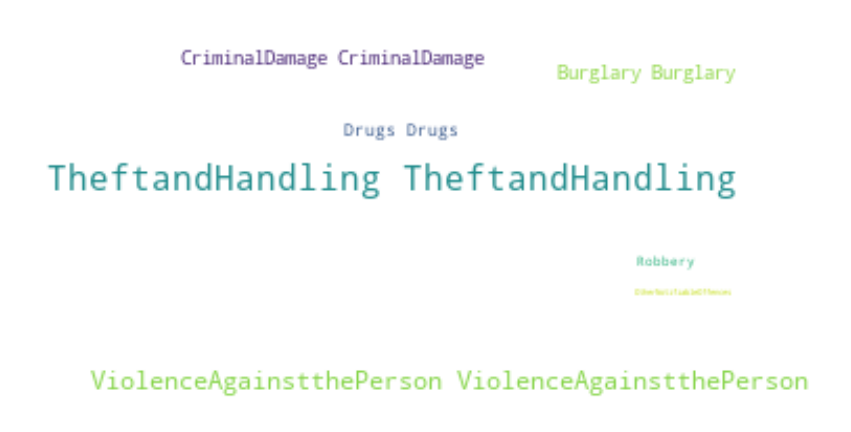

In [85]:
#buat dataframe baru yang mengambil data yang tahunnya 2016, lalu dipilih hanya kolom 'Kejahatan Mayor' dan 'Jumlah Kasus'
df_word_cloud = df[
    df['year']==2008
][['major_category','value']]

# Menghapus spasi yang terdapat pada Kejahatan Mayor
df_word_cloud['major_category'] = df_word_cloud['major_category'].apply(lambda x: ''.join(x.split()))

# menjumlahkan total kasus kejahatan berdasarkan "Kejahatan Mayor"
df_word_cloud = df_word_cloud.groupby('major_category').sum()
df_word_cloud.index.name = None

# hitung sum dari 'Jumlah Kasus'
total_keseluruhan_kasus = df_word_cloud['value'].sum()

# mengatur kata maksimum untuk proporsi dalam word cloud
max_words = 100

#inisialisasi string kosong untuk menampung cloning 'Kejahatan Mayor' sebanyak persentasenya
word_string = ''

#lakukan perulangan untuk setiap 'Kejahatan Mayor' yang ada
for crime_cat in df_word_cloud.index.values:
    # lakukan copy string 'Kejahatan Mayor' sebesar proporsinya terhadap keseluruhan kasus
    repeat_num_crime_cat = int(
        df_word_cloud.loc[crime_cat, 'value']/float(total_keseluruhan_kasus)*max_words)
    # concat ke word_string sejumlah repeat_num_crime_cat
    word_string = word_string + ((crime_cat + ' ') * repeat_num_crime_cat)

# Instansiasi objek WordCloud dengan warna background putih
crime_category_word_cloud = WordCloud(
    background_color='white'
)
#generate word_string ke dalam objek Word CLoud
crime_category_word_cloud.generate(word_string)

fig = plt.figure() #buat figure
fig.set_figwidth(15) #setting lebar figure
fig.set_figheight(18) #setting tinggi figure

# Display the word cloud
plt.imshow(crime_category_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Folium

Folium is a powerful Python library that helps you create several types of Leaflet maps. The fact that the Folium results are interactive makes this library very useful for dashboard building.

From the official Folium documentation page:

> Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via Folium.

> Folium makes it easy to visualize data that's been manipulated in Python on an interactive Leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing Vincent/Vega visualizations as markers on the map.

> The library has a number of built-in tilesets from OpenStreetMap, Mapbox, and Stamen, and supports custom tilesets with Mapbox or Cloudmade API keys. Folium supports both GeoJSON and TopoJSON overlays, as well as the binding of data to those overlays to create choropleth maps with color-brewer color schemes.

In [86]:
#!conda install -c conda-forge folium=0.5.0 --yes
!pip install folium
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [88]:
# setting latitude and longitude for London Maps
london_lattitude = 51.509865
london_longitude = -0.118092

# Instansiasi objek Folium.Map
london_map = folium.Map(
    location=[london_lattitude, london_longitude],
    zoom_start=9
)

# display London Map
london_map

Thanks For Completing This Labs!